In [37]:
import umap
import pandas as pd
import torch
from models.encoder import AutoEncoderCnn
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# load encoder

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoEncoderCnn()
model.load_state_dict(torch.load('models/model.pth'))
model.to(device)

AutoEncoderCnn(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
  (conv2): Conv1d(64, 128, kernel_size=(3,), stride=(1,))
  (conv3): Conv1d(128, 256, kernel_size=(3,), stride=(1,))
  (fc1): Linear(in_features=5376, out_features=128, bias=True)
  (encoder): Sequential(
    (0): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv1d(64, 128, kernel_size=(3,), stride=(1,))
    (4): ReLU()
    (5): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv1d(128, 256, kernel_size=(3,), stride=(1,))
    (7): ReLU()
    (8): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=5376, out_features=128, bias=True)
  )
  (fc2): Linear(in_features=128, out_features=6144, bias=True)
  (deconv1): ConvTranspose1d(256, 128, kernel_size=(3,), stride=(2,), padding=(1,))

## Create ptb embeddings

In [25]:
# load ptb data
ptb_train = pd.read_csv('data/ptbdb_train.csv', header=None)
ptb_test = pd.read_csv('data/ptbdb_test.csv', header=None)

ptb_train = ptb_train.drop(187, axis=1).values
ptb_test = ptb_test.drop(187, axis=1).values

#prepare for cnn
ptb_train = torch.tensor(ptb_train).float().to(device).unsqueeze(1)
ptb_test = torch.tensor(ptb_test).float().to(device).unsqueeze(1)

# get embeddings
model.eval()
with torch.no_grad():
    train_embeddings = model.encoder(ptb_train).cpu().numpy()
    test_embeddings = model.encoder(ptb_test).cpu().numpy()

# save embeddings as npy
np.save('data/ptb_train_embeddings.npy', train_embeddings)
np.save('data/ptb_test_embeddings.npy', test_embeddings)

## load embeddings

In [31]:
# load mit data
mit_train_embedding = np.load('data/encoding_train.npy')
mit_test_embedding = np.load('data/encoding_test.npy')


In [33]:
# load pit data
ptb_train_embedding = np.load('data/ptb_train_embeddings.npy')
ptb_test_embedding = np.load('data/ptb_test_embeddings.npy')


In [40]:
# get labels
mit_train_labels = pd.read_csv('data/mitbih_train.csv', header=None).iloc[:, -1].values
mit_test_labels = pd.read_csv('data/mitbih_test.csv', header=None).iloc[:, -1].values
ptb_train_labels = pd.read_csv('data/ptbdb_train.csv', header=None).iloc[:, -1].values
ptb_test_labels = pd.read_csv('data/ptbdb_test.csv', header=None).iloc[:, -1].values


## Visulize PIT data

In [34]:
# plot umap decomposition for ptb data for train and test   
reducer = umap.UMAP()

mit_train_reduced = reducer.fit_transform(mit_train_embedding)
mit_test_reduced = reducer.fit_transform(mit_test_embedding)


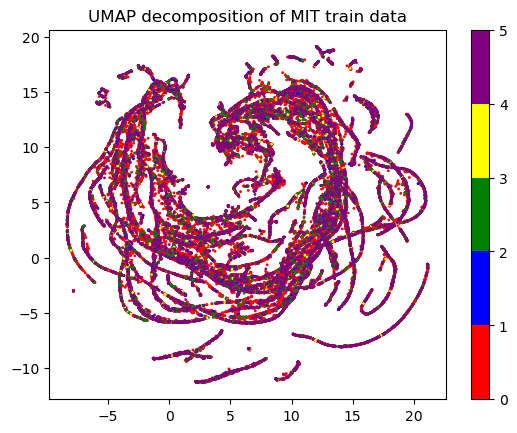

In [44]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# Define the colormap with 5 discrete colors
cmap = ListedColormap(['red', 'blue', 'green', 'yellow', 'purple'])

# Define the boundaries for the colorbar
bounds = [0, 1, 2, 3, 4, 5]
norm = BoundaryNorm(bounds, cmap.N)

# Plot the scatter plot with discrete colors and colorbar
plt.scatter(mit_train_reduced[:, 0], mit_train_reduced[:, 1], c=mit_train_labels, cmap=cmap, norm=norm, s=1)
plt.colorbar(ticks=bounds)
plt.title('UMAP decomposition of MIT train data')
plt.show()


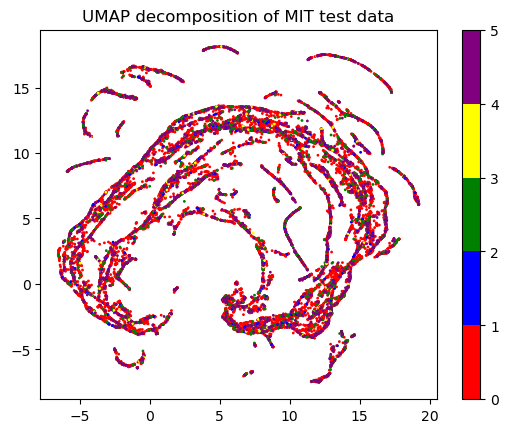

In [45]:
# plot mit test data    
plt.scatter(mit_test_reduced[:, 0], mit_test_reduced[:, 1], c=mit_test_labels, cmap=cmap, norm=norm, s=1)
plt.colorbar(ticks=bounds)
plt.title('UMAP decomposition of MIT test data')
plt.show()


In [50]:
# make umap decomposition for ptb data

reducer = umap.UMAP(n_components=2, n_neighbors=40, min_dist=0.1, metric='euclidean', random_state=42)
ptb_train_reduced = reducer.fit_transform(ptb_train_embedding)
ptb_test_reduced = reducer.fit_transform(ptb_test_embedding)

c:\Users\MarvinLob\anaconda3\envs\ml4h\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\MarvinLob\anaconda3\envs\ml4h\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


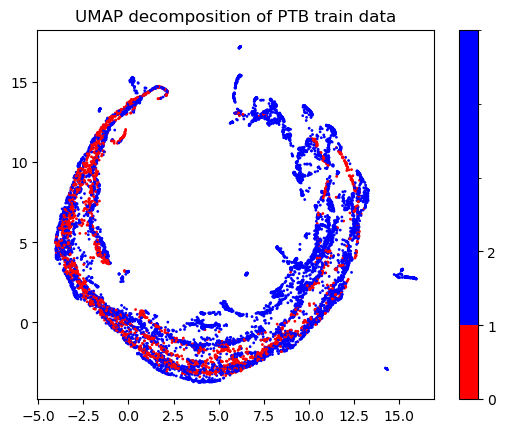

In [51]:
# plot ptb train data for the 2 classes
cmap = ListedColormap(['red', 'blue'])
bounds = [0, 1, 2]
plt.scatter(ptb_train_reduced[:, 0], ptb_train_reduced[:, 1], c=ptb_train_labels, cmap=cmap, norm=norm, s=1)
plt.colorbar(ticks=bounds)
plt.title('UMAP decomposition of PTB train data')
plt.show()

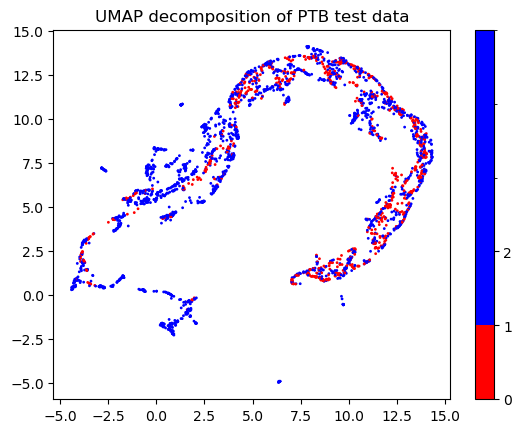

In [48]:
# plot ptb test data for the 2 classes
plt.scatter(ptb_test_reduced[:, 0], ptb_test_reduced[:, 1], c=ptb_test_labels, cmap=cmap, norm=norm, s=1)
plt.colorbar(ticks=bounds)
plt.title('UMAP decomposition of PTB test data')
plt.show()
